In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

<AxesSubplot: xlabel='Date'>

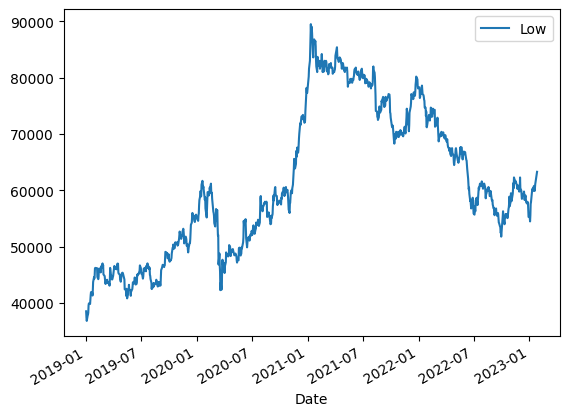

In [11]:
stock = pd.read_csv('Samsung Electronics Stock Price.csv')
stock = stock.drop(['Open', 'High', 'Close', 'Adj Close', 'Volume'], axis=1)
stock['Date']=pd.to_datetime(stock['Date'])
stock.set_index('Date', inplace=True)
stock.plot()

In [19]:
auto = auto_arima(y = stock['Low'], trace = True, error_action = 'ignore', start_p = 0, start_q = 0, max_p = 3, max_q = 3,
                  suppose_warnings = True, stepwise=False, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16495.621, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16496.100, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16497.649, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=16499.583, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=16501.268, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16496.050, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16497.866, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16499.542, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=16501.772, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=16503.202, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16497.659, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16500.158, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16501.553, Time=0.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16495.369, Time=1.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16499.581, Time=0.08

In [20]:
model = ARIMA(stock['Low'], order=(2,1,3))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\jinw0\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jinw0\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 1003
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -8240.837
Date:                Tue, 28 Feb 2023   AIC                          16493.673
Time:                        22:23:18   BIC                          16523.132
Sample:                             0   HQIC                         16504.869
                               - 1003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5962      0.022    -72.926      0.000      -1.639      -1.553
ar.L2         -0.9601      0.021    -45.186      0.000      -1.002      -0.919
ma.L1          1.6378      0.030     54.223      0.0

c:\Users\jinw0\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: xlabel='Date'>

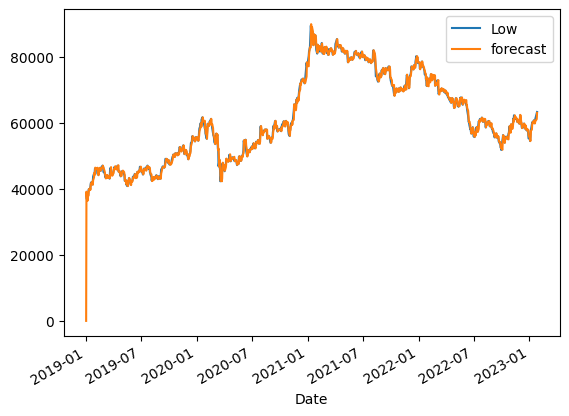

In [21]:
stock['forecast']=model_fit.predict()
stock[['Low', 'forecast']].plot()

In [22]:
forecast_result = model_fit.forecast(steps=15)
print(forecast_result)

1003    63371.465231
1004    63315.105186
1005    63346.429759
1006    63350.542526
1007    63313.901324
1008    63368.440328
1009    63316.564430
1010    63347.004826
1011    63348.223494
1012    63317.050888
1013    63365.639508
1014    63318.011137
1015    63347.384751
1016    63346.227990
1017    63319.871391
Name: predicted_mean, dtype: float64


c:\Users\jinw0\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
